## Group Members and Contributions

- __Kenta Asai (A )__
    - a
- __Riley Froehlich (A )__
    - Data Cleaning/Wrangling
- __Aniket Ghatnekar (A )__
    - Data Analysis
- __Stephanie Shon (A13811108)__
    - Data Cleaning/Wrangling
- __Haimei Yang (A13919498)__
    - Data Analysis
- __Jeffrey Yao (A )__
    - Data Analysis

## Introduction

 __DATA SCIENCE QUESTION(S) & HYPOTHESIS:__

- Proposed Question
    - How does the frequency of traffic collisions change based on street quality index, traffic volume, and parking meter locations in the city of San Diego?

- Hypothesis
    - We hypothesize that traffic collisions in San Diego will have a higher frequency on streets that have lower OCI’s (Overall Condition Index), higher traffic volume, and will depend on the number of parking meters,  in an area (and thereby, variance of available parking spaces).

We think this topic has ample scope to explore a very important civil and social safety issue. By analysing how traffic collisions vary based on a variety of factors in our own city of San Diego, we plan to find the best way to reduce collisions generally. Although this is a specific analysis in only one city, we hope that highly correlational variables can be recognized with global applicability, at least to some degree.

### Background

Safety is the number one priority when driving. Unfortunately, traffic collisions and rule breaking happen regularly and can range from minor incidents to severe injuries and even death. The number of traffic collisions in San Diego increase every year, and this could potentially affect UCSD students and faculty as many people use cars to commute to and from school. As students of UCSD, we want to find out if San Diego traffic collisions are affected by factors such as street quality, traffic density and the number of parking meters in an effort to gain a better understanding of which areas are most prone to collisions.

There has been a multitude of prior research that has studied the relationship between traffic collisions and different factors such as parking and driver behavior, in an attempt to improve road safety.

For starters, it is important to note that in Miller’s (2016) article, he recognizes that “while pedestrian-related collisions made up a very small share of priority corridor collisions, they comprised over two-thirds (67%) of the fatal collisions on those roadways.” Considering the statistics on the amount of accidents that include pedestrians, there is a big concern that the collisions on the road may affect those who aren’t in a vehicle. This increases the awareness of how deadly these collisions can be, and will continue to be, if there aren’t preventative measures taken for both the pedestrian and driver. In addition, there has been a study by NYU that determined a “71% correlation between risky driving behavior and traffic accidents and concluded that safer driving habits would help to prevent future traffic accidents” (Bousquet, 2017).  The percentage of parking-related midblock accidents increase as the size of streets decrease from a highway to a local street (Jack B. Humphreys & Donald J. Wheeler 1979). Highways do not have parking, but smaller local roads have parking spaces and meters by the sidewalk. 

Although these studies have found that these behaviors seem to play a big factor in road accidents, our team wants to research the cause of collisions from a different perspective. With the pressing issue of the increase in traffic collisions every year, we wanted to find more data on whether the OCI (Overall Condition Index), traffic volume, and the number of parking meters and/or spaces have played a role in the road accidents, in hopes that future preventative measures will be made.

__References:__
- (Humphreys & Wheeler, 1979) : http://onlinepubs.trb.org/Onlinepubs/trr/1979/722/722-004.pdf
- (Miller, 2016): https://datasmart.ash.harvard.edu/news/article/san-jose-tackles-traffic-with-data-802)
- (Bousquet, 2017): https://datasmart.ash.harvard.edu/news/article/can-better-data-make-zero-traffic-deaths-a-reality-1138)

## Data

The following are links to the datasets to be used in this project(as of now, more datasets may be added as needed):

- Traffic Collisions dataset: https://data.sandiego.gov/datasets/police-collisions/
- Street quality datasets:https://data.sandiego.gov/datasets/streets-overall-condition-index/
- Parking meter dataset: https://data.sandiego.gov/datasets/parking-meters-locations/
- Traffic volumes dataset: https://data.sandiego.gov/datasets/traffic-volumes/


The traffic collisions dataset includes all kinds of unlawful acts caught by the local police, such as taking illegal turns, stop requirements, and hit and runs. There are a total of 22,862 observations and with each observation, there is an indicated date, time, street number, street name, street type, violation type, and the number of people injured or killed.

The street quality datasets contains two sets of data measuring the quality of streets in San Diego based on an Overall Condition Index (OCI). One data set is from 2011 and contains 28,098 observations whereas the other data set is from 2015 and contains 30,712 observations. Each observation has an overall condition index, street name, segment length, segment width, the square footage of the segment, what type of street and pavement it is, and a description on whether it is good, fair or poor. 

The parking meter dataset contains the location of parking meters in San Diego. There are a total of 4668 observations and each observation has a zone, an area, a sub-area and the meter’s longitude and latitude. 

The traffic volumes dataset contains the count of vehicles on city streets reported in the form of Average Daily Traffic (ADT). This gives us a good idea of the average traffic volume on each street. There are 11659 observations and each observation has the date the observation was made, the street a segment is on, the cross street limits of a segment, and the counts of cars going north, east, west, and southbound. 

All the datasets cover records over the past couple years, hence giving a large enough combined dataset to work with. We plan to extract the features our project is concerned with, and combine them sensibly into one dataset for ease of analysis.

Cleaning the data will be required as many entries under some columns are not filled. Fortunately, since these are mostly names of streets we do not need them(we will use the street locations and codes instead). We might also find that features such as police beats considerably influence traffic collision frequency during exploratory analysis, and may decide to include features based on degree of correlation.


## Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from functools import reduce

In [2]:
# method to display all df heads
def multiple_df_display(*arg):
    html_str=''
    for df in arg:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

In [4]:
#parse data
df_index = pd.read_csv("oci_2015_datasd.csv")
df_collisions = pd.read_csv("pd_collisions_datasd.csv")
df_traffic = pd.read_csv("traffic_counts_datasd.csv")
df_meters = pd.read_csv("treas_parking_meters_loc_datasd.csv")

#drop OCI columns
df_index.drop( columns = "seg_id", inplace = True )
df_index.drop( columns = "seg_length_ft", inplace = True )
df_index.drop( columns = "seg_width_ft", inplace = True )
df_index.drop( columns = "street_from", inplace = True )
df_index.drop( columns = "street_to", inplace = True )
df_index.drop( columns = "oci_wt", inplace = True )
df_index.drop( columns = "pvm_class", inplace = True )
df_index.drop( columns = "func_class", inplace = True )

#drop collision columns
df_collisions.drop( columns = "report_id", inplace = True )
df_collisions.drop( columns = "cross_st_name", inplace = True )
df_collisions.drop( columns = "cross_st_type", inplace = True )
df_collisions.drop( columns = "street_dir", inplace = True )
df_collisions.drop( columns = "cross_st_dir", inplace = True )
df_collisions.drop( columns = "violation_section", inplace = True )
df_collisions.drop( columns = "violation_type", inplace = True )
df_collisions.drop( columns = "charge_desc", inplace = True )
df_collisions.drop( columns = "injured", inplace = True )
df_collisions.drop( columns = "killed", inplace = True )
df_collisions.drop( columns = "hit_run_lvl", inplace = True )
# combine street name and street type
df_collisions[ 'street' ] = df_collisions[ 'street_name' ].map( str ) + ' ' + df_collisions[ 'street_type' ]
df_collisions.drop( columns = "street_name", inplace = True )
df_collisions.drop( columns = "street_type", inplace = True )
df_collisions.dropna( inplace = True )

#drop traffic columns
df_traffic.drop( columns = "id", inplace = True )
df_traffic.drop( columns = "all_count", inplace = True )
df_traffic.drop( columns = "northbound_count", inplace = True )
df_traffic.drop( columns = "southbound_count", inplace = True )
df_traffic.drop( columns = "eastbound_count", inplace = True )
df_traffic.drop( columns = "westbound_count", inplace = True )
df_traffic.drop( columns = "file_no", inplace = True )
#new splits data in 'limits' column and puts the two parts into columns named 'limit_1' and 'limit_2'
new = df_traffic[ 'limits' ].str.split( ' - ', n = 1, expand = True) 
df_traffic[ 'limit_1' ] = new[ 0 ]
df_traffic[ 'limit_2' ] = new[ 1 ]
df_traffic.drop( columns = "limits", inplace = True )
#df2 combines like elements in df_traffic
#df2 = df_traffic.groupby( [ 'street_name', 'limit_1', 'limit_2', 'count_date' ], as_index = False).agg({ 'total_count' : 'sum' })
#df_traffic = pd.DataFrame( df2 )
df_traffic.dropna( inplace = True )

df_meters.drop( columns = "area", inplace = True )
df_meters.drop( columns = "pole", inplace = True )
df_meters.drop( columns = "config_id", inplace = True )
df_meters.drop( columns = "config_name", inplace = True )
df_meters.dropna( inplace = True )

print(len(df_index))

multiple_df_display(df_index[0:5], df_collisions[0:5], df_traffic[0:5], df_meters[0:5])

30712


,oci,street,area_sq_ft,oci_desc
0,65.14,ALLEY,23181.774,Fair
1,67.45,ALLEY,5880.075,Fair
2,70.88,ALLEY,11850.147,Good
3,84.00,ALLEY,5760.075,Good
4,79.24,ALLEY,7552.620,Good
,date_time,police_beat,street_no,street
0,2017-01-01 00:01:00,124,8300,CAM DEL ORO
1,2017-01-01 00:01:00,322,6400,CRAWFORD STREET
2,2017-01-01 00:01:00,325,8100,ROYAL GORGE DRIVE
3,2017-01-01 00:01:00,935,5500,VALERIO TRAIL


## Descriptive Analysis

In [13]:
# initializing dictionary of collisions and street names
num_collisions = {}

# converting street types to standard short forms used in maps
conversion = {"STREET" : "ST", "AVENUE": "AV", "CIRCLE": "CR", "WAY":" WY", "ROAD": "RD", 
              "COURT" : "CT", "DRIVE" : "DR", "LANE": "LN", "PLACE": "PL", }

# make a copy of df_traffic so we can drop years that are not 2015
copy_df = df_collisions.copy()

#drops the rows that aren't from the year 2018 
collisions_2018 = copy_df[copy_df['date_time'].str.contains("2018")]


# loop through collisions dataframe
for index, row in collisions_2018.iterrows():
    street_type = str(row['street']).split(' ')[-1]
    
    if conversion.get(street_type) != None:
        street_type = conversion[street_type]
    street_name = ' '.join(str(row['street']).split(' ')[0:-1]) + " " + street_type
    if num_collisions.get(street_name) == None:
        num_collisions[street_name] = 0;
    num_collisions[street_name]+=1;

#creating new column in df_index
df_index['collisions'] = 0

#filling the collisions column
for index, row in df_index.iterrows():
    street = str(row['street'])
    if num_collisions.get(street) != None:
        df_index.loc[index, 'collisions'] = num_collisions[street]

df_index_collisions = df_index[df_index.collisions != 0]

df_index_collisions

,oci,street,area_sq_ft,oci_desc,collisions
2053,79.300,44TH ST,11322.960,Good,5
2055,78.500,01ST AV,7295.655,Good,33
2056,84.978,01ST AV,14080.000,Good,33
...,...,...,...,...,...
30681,81.000,ALPINE RIDGE RD,7820.000,Good,1
30684,83.742,ALPINE RIDGE RD,28050.000,Good,1
30711,80.828,CANON ST,7351.480,Good,6


Mean oci of streets with at least one collision: 69.917
Standard Deviation of oci of street with at least one collision: 18.211
Max oci of streets with at least one collision: 100.000
Min oci of streets with at least one collision: 0.000

Mean collisions of streets with at least one collision: 16.025
Max collisions of streets: 277
Min collisions of streets: 1
Collision variance of streets with at least one collision: 1115.771


Text(0.5, 1.0, 'OCI vs Collisions')

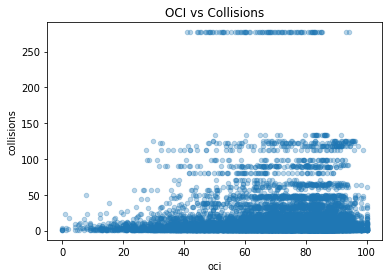

In [14]:
oci_mean = df_index_collisions['oci'].mean()
oci_std = df_index_collisions['oci'].std()
oci_max = df_index_collisions['oci'].max()
oci_min = df_index_collisions['oci'].min()

collisions_mean = df_index_collisions['collisions'].mean()
collisions_max = df_index_collisions['collisions'].max()
collisions_min = df_index_collisions['collisions'].min()
collisions_var = df_index_collisions['collisions'].var()

print("Mean oci of streets with at least one collision: " + format(oci_mean, '.3f'))
print("Standard Deviation of oci of street with at least one collision: " + format(oci_std, '.3f'))
print("Max oci of streets with at least one collision: " + format(oci_max, '.3f'))
print("Min oci of streets with at least one collision: " + format(oci_min, '.3f') + "\n")

print("Mean collisions of streets with at least one collision: " + format(collisions_mean, '.3f'))
print("Max collisions of streets: " + format(collisions_max, '.0f'))
print("Min collisions of streets: " + format(collisions_min, '.0f'))
print("Collision variance of streets with at least one collision: " + format(collisions_var, '.3f'))

#oci vs collisions
df_index_collisions.plot.scatter('oci', 'collisions', alpha=0.3)
plt.title('OCI vs Collisions')

In [15]:
#this takes a range of values by 10 from oci to show that there's no correlation
counts = ('0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100')

lst = list(df_index_collisions['oci'])

mean1 = df_index_collisions['oci'].iloc[0:10].mean(axis=0)
mean2 = df_index_collisions['oci'].iloc[10:20].mean(axis=0)
mean3 = df_index_collisions['oci'].iloc[20:30].mean(axis=0)
mean4 = df_index_collisions['oci'].iloc[30:40].mean(axis=0)
mean5 = df_index_collisions['oci'].iloc[40:50].mean(axis=0)
mean6 = df_index_collisions['oci'].iloc[50:60].mean(axis=0)
mean7 = df_index_collisions['oci'].iloc[60:70].mean(axis=0)
mean8 = df_index_collisions['oci'].iloc[70:80].mean(axis=0)
mean9 = df_index_collisions['oci'].iloc[80:90].mean(axis=0)
mean10 = df_index_collisions['oci'].iloc[90:100].mean(axis=0)

print(mean1)
print(mean2) 
print(mean3) 
print(mean4)
print(mean5) 
print(mean6) 
print(mean7) 
print(mean8) 
print(mean9)
print(mean10)

73.0762
63.665
72.823
70.777
63.75940000000001
79.976
76.1604
62.6854
59.1034
77.76240000000001


The mean values taken for each range of oci are too close to show any meaningful information. We forgot to consider the dates and take into account that street quality changes with time.

### Updating Data Analysis

We are going to consider the year 2015 from the OCI dataframe and filter out the other dataframes by the same year in order to find the correlation for the OCI.


We are going to perform an analysis between collisions and traffic volume. 

In [16]:
# initialize a dictionary to store the average traffic count on a street
# key: street
# value: (total traffic count, number of times counted)
average_traffic_count = {}

# initialize a list to store the street names used in traffic_count dataset
street_names = []

# initialize a list to store the average traffic volume 
total_count = []

# make a copy of df_traffic so we can drop years that are not 2015
copy_df = df_traffic.copy()

#drops the rows that aren't from the year 2018 
traffic_count_2018 = copy_df[copy_df['count_date'].str.contains("2018")]

# loop through df_traffic and obtain average traffic count per street
for index, row in traffic_count_2018.iterrows():
    # obtain the current street name and the total traffic volume on that street
    street = str(row['street_name'])
    traffic_count = row['total_count']
    
    # add the street and traffic_count information to our data structures
    # if the street is not in the average_traffic_count dictionary
    if street not in average_traffic_count:
        # add the street to the dictionary with a value of (traffic_count, 1)
        average_traffic_count[street] = (traffic_count, 1)
    else:
        # otherwise, increment the count and add to the total traffic count
        street_count = average_traffic_count[street][1] + 1
        prev_traffic_count = average_traffic_count[street][0]
        new_traffic_count = prev_traffic_count + traffic_count
        average_traffic_count[street] = (new_traffic_count, street_count)


# filling the street_names list with streets in average_traffic_count
for street, street_count in average_traffic_count.items():
    street_names.append(street)

# filling the total_count list with the average traffic count
for street, street_count in average_traffic_count.items():
    total_count.append(int(street_count[0]/street_count[1]))

# creating a new dataframe using the two lists created above
data = {'street_name' : street_names, 'average_total_count' : total_count}    
df_traffic_collisions = pd.DataFrame(data)

# adding a new column to df_traffic_collisions
df_traffic_collisions['collisions'] = 0

# filling in the new column with collision data
for index, row in df_traffic_collisions.iterrows():
    street = str(row['street_name'])
    if street in num_collisions:
        df_traffic_collisions.loc[index, 'collisions'] = num_collisions[street]

# remove all rows where there are no traffic collisions
df_traffic_collisions = df_traffic_collisions[df_traffic_collisions.collisions != 0]

df_traffic_collisions

Now we want to visualize the average volume of traffic on a street plotted against the number of collisions. We can do so with a simple scatter plot with the total_average_count as the x-axis and the number of collisions as the y-axis. 

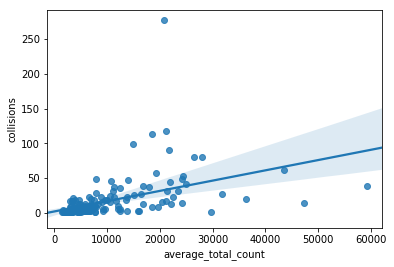

In [19]:
# attempting to draw a line plot, mapping average volume to collisions
sns.regplot(x='average_total_count', y='collisions', data = df_traffic_collisions)


In [10]:
#creating a new copy of the traffic counts dataframe with just the count dates from the year 2015
copy_df = df_traffic.copy()

#drops the rows that aren't from the year 2015
volume2015 = copy_df[copy_df['count_date'].str.contains("2015")]

print("Mean collisions of streets with at least one collision: " + format(collisions_mean, '.3f'))
print("Max collisions of streets: " + format(collisions_max, '.0f'))
print("Min collisions of streets: " + format(collisions_min, '.0f'))
print("Collision variance of streets with at least one collision: " + format(collisions_var, '.3f'))


Mean collisions of streets with at least one collision: 16.025
Max collisions of streets: 277
Min collisions of streets: 1
Collision variance of streets with at least one collision: 1115.771
